# Tutorial sobre el Clasificador Lineal Perceptrón

## 1. Fundamentos de la técnica

El perceptrón es un algoritmo de aprendizaje supervisado para tareas de casificación binaria.
Su manera de operar es a través de un proceso iterativo donde aprende de los datos de entrenamiento ajustando sus pesos, logrando así clasificar los datos que reciba en dos clases siempre y cuando dichos datos sean linealmente separables.

## 2. Modelo matemático del Perceptrón

El Perceptrón funciona calculando una "suma ponderada" de las características de entrada y aplicando una función de activación escalón para producir una salida.

**1. Suma Ponderada (Entrada Neta):**
Para un vector de entrada $x = (x_1, x_2, ..., x_n)$ y un vector de pesos $w = (w_1, w_2, ..., w_n)$, más un término de sesgo (bias) $b$, la entrada neta $z$ se calcula como:

$$z = (w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_n \cdot x_n) + b = \mathbf{w} \cdot \mathbf{x} + b$$

**2. Función de Activación (Escalón):**
La salida ($\hat{y}$) es determinada por una función escalón, que compara $z$ con un umbral (en este caso, 0):

$$\hat{y} = \phi(z) = \begin{cases} 1 & \text{si } z \ge 0 \\ 0 & \text{si } z < 0 \end{cases}$$

(Las clases pueden ser {0, 1} o {-1, 1} dependiendo de la implementación).

**3. Regla de Actualización (Aprendizaje):**
Si el modelo clasifica mal una muestra, los pesos y el sesgo se actualizan según la siguiente regla (conocida como la regla de aprendizaje del Perceptrón):

$$w_j(\text{nuevo}) = w_j(\text{viejo}) + \eta \cdot (y - \hat{y}) \cdot x_j$$
$$b(\text{nuevo}) = b(\text{viejo}) + \eta \cdot (y - \hat{y})$$

Donde:
* $\eta$ (eta) es la **tasa de aprendizaje** (un hiperparámetro pequeño, ej. 0.1).
* $y$ es la etiqueta real.
* $\hat{y}$ es la etiqueta predicha por el modelo.
* $x_j$ es el valor de la característica $j$ de la muestra.

## 3. Descripción de la librería, clases y funciones (Python)

Para este tutorial, no se implementará el perceptrón desde cero, sino que se hará uso de la librería **Scikit-learn** (`sklearn`), además de `Numpy` para la manipulación de arreglos y `Matplotlib` para la visualización.

Comenzando por las importaciones:

In [29]:
# Importaciones generales
import numpy as np
import matplotlib.pyplot as plt

# Funciones de Scikit-learn para la generación de datos y preprocesamiento
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Implementación del Perceptron
from sklearn.linear_model import Perceptron

# El criterio de éxito Accuracy
from sklearn.metrics import accuracy_score

# Configuración para que los gráficos se muestren en el notebook
%matplotlib inline

Para comprender el código anterior, se detallan las herramientas empleadas y su descripción a continuación:

* `numpy`: Es la biblioteca fundamental para la computación científica en Python. Se usará para manejar los datos como arreglos (arrays).
* `matplotlib.pyplot`: Se utiliza para crear visualizaciones estáticas, como el gráfico de dispersión de los datos.
* `make_blobs`}: Se trata de una función de `sklearn` para generar conjuntos de datos sintéticos ("blobs" o cúmulos) que son ideales para probar algoritmos de clasificación.
* `train_test_split`: Divide los datos en conjuntos de entrenamiento (para enseñar al modelo) y de prueba (para evaluarlo).
* `StandardScaler`: Es un preprocesador que estandariza las características (media=0, varianza=1). Se usa debido a que el perceptrón es sensible a la escala de los datos.
* `Perceptron`: Esta es la clase de `sklearn` que implementa el algoritmo del Perceptrón.
* `accuracy_score`: Es la métrica o criterio para evaluar el rendimiento del modelo.

## 4. Pipeline

### Feature Engineering

El conjunto de datos a utilizar será generado de manera sintética usando `make_blobs`.

**Variables:**
* **Entrada (Features):** Crearemos 2 características (features), $X_1$ y $X_2$, permitiendo así visualizar los datos fácilmente en un gráfico 2D.
* **Salida (Target):** Crearemos 2 clases (target), $y \in \{0, 1\}$.

Se generarán 100 muestras (`n_samples=100`) y nos aseguraremos de que los datos sean linealmente separables ajustando `cluster_std`.

Además, se aplicará el **Escalado de Características** usando `StandardScaler` y se repartirán los datos en un 70% de entrenamiento y 30% de prueba.

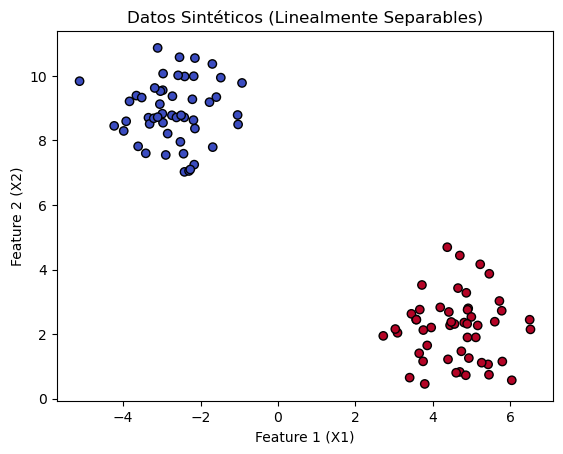

Datos de entrenamiento: (70, 2)
Datos de prueba: (30, 2)


In [28]:
# 1. Generar datos sintéticos
# centers=2 significa que queremos 2 clases
# colocar random_state=42 asegura que se obtengan los mismos datos cada vez que ejecutemos
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42, cluster_std=1.0)

# 2. Visualizar los datos iniciales
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Datos Sintéticos (Linealmente Separables)")
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.show()

# 3. Escalar los datos
# El Perceptrón funciona mejor con datos escalados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

Con esto ya tenemos los conjuntos de entrenamiento y prueba preparados.

### Model Selection

**¿Por qué emplear un clasificador lineal (Perceptrón)?**

Principalmente por las siguientes razones:
 * Es simple de comprender.
 * Requiere pocos recursos computacionales a comparación de algoritmos más complejos.
 * Es ideal como punto de partida antes de probar con modelos más complejos.

### Model Training

Una vez que se tiene los datos preparados, se puede comenzar a entrenar el modelo, lo cual implica dos puntos:
1. Crear una instancia de la clase `Perceptron` de `sklearn`.
2. Usar el método `.fit` con los datos y etiquetas de entrenamiento.

Por su parte, los parámetros a configurar son los siguientes:
* `max_iter=1000`: El número máximo de iteraciones sobre los datos.
* `eta0=0.1`: La tasa de aprendizaje (controla el tamaño del paso en el ajuste de pesos).
* `random_state=42`: Para que los datos generados sean siempre los mismos. En realidad, con colocar un número fijo basta, pero este caso en particular, el 42, es una convención popular y, además, genera un conjunto de datos muy conveniente para la demostración.

In [27]:
# 1. Crear la instancia del modelo Perceptrón
perceptron_model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

# 2. Entrenar el modelo (fit)
perceptron_model.fit(X_train, y_train)

# El modelo entrenado ahora tiene pesos (coef_) y un sesgo (intercept_)
print(f"Pesos (w): {perceptron_model.coef_}")
print(f"Sesgo (b): {perceptron_model.intercept_}")

Pesos (w): [[ 0.14404742 -0.12204588]]
Sesgo (b): [0.]


### Prediction

Para probar que cada patrón de entrada es clasificado correctamente, se usará una función que toma el modelo y un solo patrón, es decir, una fila de `X_test`, y muestra la predicción.

El método `.predict()` del modelo se utiliza para obtener las clasificaciones.

In [26]:
def probar_patron_individual(modelo, patron, etiqueta_real):

    # Scikit-learn espera una entrada 2D (un lote de muestras), 
    # aunque solo sea una. Usamos .reshape(1, -1) para adaptarla.
    patron_listo_para_predecir = patron.reshape(1, -1)
    
    # Realizar la predicción
    prediccion = modelo.predict(patron_listo_para_predecir)
    
    # Imprimir resultados
    print(f"Patrón de entrada (escalado): [{patron[0]:.4f}, {patron[1]:.4f}]")
    print(f"Etiqueta Real: {etiqueta_real}")
    print(f"Predicción del modelo: {prediccion[0]}")
    
    if prediccion[0] == etiqueta_real:
        print("La clasificación es correcta")
    else:
        print("La clasificación es incorrecta")
    print("-" * 30)

# Probar con 5 patrones de prueba
print("--- Probando 5 patrones individuales del set de prueba ---")
for i in range(5):
    probar_patron_individual(perceptron_model, X_test[i], y_test[i])

--- Probando 5 patrones individuales del set de prueba ---
Patrón de entrada (escalado): [-1.1642, 0.5922]
Etiqueta Real: 0
Predicción del modelo: 0
La clasificación es correcta
------------------------------
Patrón de entrada (escalado): [1.0776, -0.8563]
Etiqueta Real: 1
Predicción del modelo: 1
La clasificación es correcta
------------------------------
Patrón de entrada (escalado): [-1.0450, 1.2979]
Etiqueta Real: 0
Predicción del modelo: 0
La clasificación es correcta
------------------------------
Patrón de entrada (escalado): [-0.5286, 0.8477]
Etiqueta Real: 0
Predicción del modelo: 0
La clasificación es correcta
------------------------------
Patrón de entrada (escalado): [0.9169, -1.2320]
Etiqueta Real: 1
Predicción del modelo: 1
La clasificación es correcta
------------------------------


### Model Evaluation

Por último, se utiliza todo el conjunto de pruebas, no solo 5 patrones, para evaluar el rendimiento del modelo usando la métrica **Accuracy**, la cual es la proporción de predicciones correctas sobre el número total de muestras.

$$\text{Accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Número total de muestras}}$$

In [25]:
# 1. Usar el modelo entrenado para predecir las etiquetas del conjunto de prueba
y_pred = perceptron_model.predict(X_test)

# 2. Calcular el Accuracy comparando las predicciones (y_pred) con las etiquetas reales (y_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Predicciones del modelo en el set de prueba: {y_pred}")
print(f"Etiquetas reales del set de prueba: {y_test}")
print(f"\nAccuracy (Precisión Global): {accuracy * 100:.2f}%")

Predicciones del modelo en el set de prueba: [0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1]
Etiquetas reales del set de prueba: [0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1]

Accuracy (Precisión Global): 100.00%


Al final obtenemos un impresionante 100% de precisión, aunque también era de esperarse porque los datos usados fueron generados para ser linelmente separables y porque el conjunto generado por `random_state=42` era muy conveniente, además de que el modelo tuvo las suficientes iteraciones para entrenar, por lo que el perceptrón encontró una solución perfecta para este escenario.

## Referencias

* Lee. (2023, 12 agosto). #10 What is a linear classifier (Perceptron). Medium. https://medium.com/@musicaround/10-what-is-a-linear-classifier-perceptron-a2356a5d86e
* colaboradores de Wikipedia. (2025b, marzo 11). Perceptrón. Wikipedia, la Enciclopedia Libre. https://es.wikipedia.org/wiki/Perceptr%C3%B3n
* Perceptron. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html